In [2]:
clean_text_DATA_PATH =  r'D:\Projects\Quantum Bits\News-Impact-on-Stock-Prices-\Project_data\output\clean_text.csv'
SNT_SCORE_DATA_PATH =  r'D:\Projects\Quantum Bits\News-Impact-on-Stock-Prices-\Project_data\output\sen_score_data.csv'


In [23]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# Funcations

In [24]:
# Initialize VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

def calculate_average_sentiment(headlines):
    # Split the combined headlines by commas
    individual_headlines = headlines.split(',')
    
    # Calculate sentiment for each individual headline
    sentiment_scores = [sid.polarity_scores(headline.strip())['compound'] for headline in individual_headlines]
    
    # Return the average sentiment score
    return np.mean(sentiment_scores)


In [77]:


def plot_sentiment_and_price_change(ticker, df):
    # Filter the DataFrame for the specific ticker
    subset = df[df['Ticker'] == ticker]
    
    # Create a figure with two vertical subplots
    fig, axs = plt.subplots(2, 1, figsize=(10, 5), sharex=True)
    
    # Plot Sentiment over Date
    axs[0].plot(subset['Date'], subset['Sentiment'], label=f'{ticker} Sentiment', color='b')
    axs[0].set_title(f'{ticker} Sentiment Over Time')
    axs[0].set_ylabel('Sentiment Score')
    axs[0].legend()
    
    # Plot Price Change over Date
    axs[1].plot(subset['Date'], subset['Price_Change'], label=f'{ticker} Price Change', color='r', linestyle='--')
    axs[1].set_title(f'{ticker} Price Change Over Time')
    axs[1].set_ylabel('Price Change')
    axs[1].set_xlabel('Date')
    axs[1].legend()
    
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45)
    
    # Adjust layout
    plt.tight_layout()
    
    # Show the plots
    plt.show()




In [33]:
df = pd.read_csv(clean_text_DATA_PATH)

# Sentiment Analysis

#### Sentiment Analysis with VADER

**Why VADER?**
- **VADER (Valence Aware Dictionary and Entiment Reasoner)** is particularly effective for sentiment analysis of short texts such as news headlines. Its dictionary-based approach provides pre-trained sentiment scores for a wide range of words and phrases, making it a practical tool for financial news, which often involves concise and impactful statements.

- VADER is well-suited for financial news because it can detect sentiment nuances, including sarcasm and intensifiers, which are common in news headlines.

- Despite its effectiveness, VADER uses a bag-of-words approach, which considers words individually without accounting for context. This limitation might affect accuracy, so you plan to explore transformer-based models in the future for more nuanced sentiment analysis.

In [34]:
# Initialize VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

In [35]:
df.head()

,Ticker,Date,Headline,Close,Price_Change,Label,Processed_Headline
0,AAPL,2024-08-28,apple becomes indias largest bluecollar job cr...,226.490005,-1.539993,-1,apple becomes india largest bluecollar job cre...
1,AAPL,2024-08-29,ipad mini 7 rumored for september launch as cu...,229.789993,3.299988,1,ipad mini 7 rumored september launch current m...
2,AAPL,2024-08-30,vertex pharmaceutical inc vrtx jim cramers got...,229.000000,-0.789993,-1,vertex pharmaceutical inc vrtx jim cramers got...
3,AMD,2024-08-20,broadcom inc avgo a tech stock to monitor amid...,156.399994,1.119995,1,broadcom inc avgo tech stock monitor amid mark...
4,AMD,2024-08-21,jim cramer on advanced micro devices inc amds ...,157.809998,1.410004,1,jim cramer advanced micro device inc amd zt sy...


In [36]:
text =  df['Headline'][4]

In [37]:
calculate_average_sentiment(text)

0.0654

In [38]:
sid.polarity_scores(text)

{'neg': 0.025, 'neu': 0.909, 'pos': 0.065, 'compound': 0.4767}

In [39]:
# Apply the function to the Headline column
df['Sentiment'] = df['Headline'].apply(calculate_average_sentiment)

In [40]:
df.head()

,Ticker,Date,Headline,Close,Price_Change,Label,Processed_Headline,Sentiment
0,AAPL,2024-08-28,apple becomes indias largest bluecollar job cr...,226.490005,-1.539993,-1,apple becomes india largest bluecollar job cre...,0.087822
1,AAPL,2024-08-29,ipad mini 7 rumored for september launch as cu...,229.789993,3.299988,1,ipad mini 7 rumored september launch current m...,0.089703
2,AAPL,2024-08-30,vertex pharmaceutical inc vrtx jim cramers got...,229.000000,-0.789993,-1,vertex pharmaceutical inc vrtx jim cramers got...,0.120996
3,AMD,2024-08-20,broadcom inc avgo a tech stock to monitor amid...,156.399994,1.119995,1,broadcom inc avgo tech stock monitor amid mark...,0.116386
4,AMD,2024-08-21,jim cramer on advanced micro devices inc amds ...,157.809998,1.410004,1,jim cramer advanced micro device inc amd zt sy...,0.065400


<Axes: xlabel='Label'>

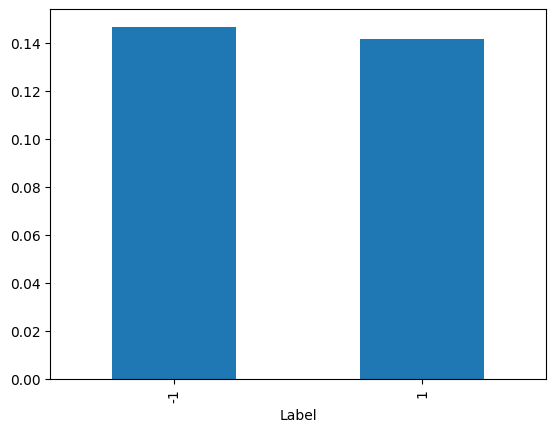

In [42]:
df.groupby('Label')['Sentiment'].mean().plot(kind='bar')

# EDA

1 - Scatter Plot of Sentiment vs. Price Change

Purpose: To visualize the relationship between sentiment scores and stock price changes. This helps to see if there's a trend where more positive or negative sentiment corresponds with larger price changes

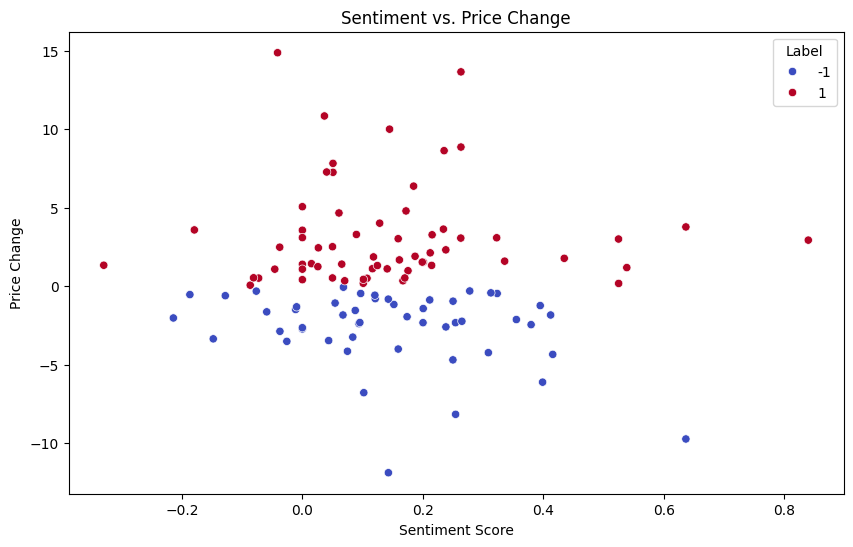

In [49]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Sentiment', y='Price_Change', hue='Label', palette='coolwarm')
plt.title('Sentiment vs. Price Change')
plt.xlabel('Sentiment Score')
plt.ylabel('Price Change')
plt.show()


based on this plot, no significant effect of the news sentiment scores to stock prices

2-Correlation Heatmap

Purpose: To show the correlation between sentiment scores, price changes, and other numerical features. This helps to quantify how sentiment relates to price changes.

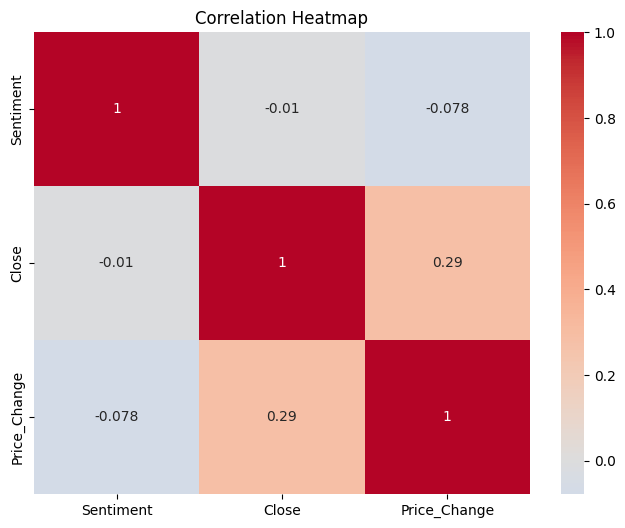

In [59]:
corr = df[['Sentiment', 'Close' ,  'Price_Change']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

There is a very week correlation between sentiment scores and price changes 

## Now let's see the effect of sentiment in each Ticker 

In [44]:
df['Ticker'].unique()

array(['AAPL', 'AMD', 'AMZN', 'BABA', 'DELL', 'GOOGL', 'INTC', 'META',
       'MSFT', 'NFLX', 'NVDA', 'ORCL', 'TSLA'], dtype=object)

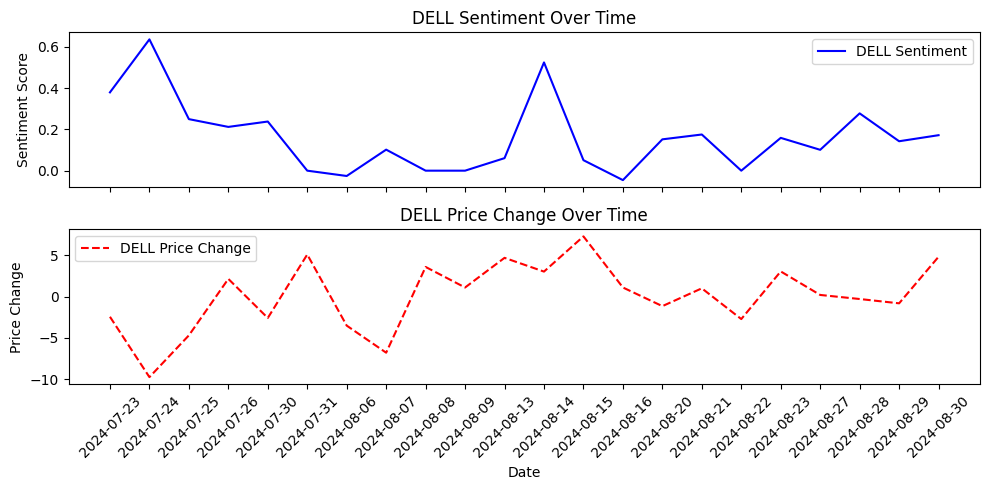

In [78]:

ticker = 'DELL'
plot_sentiment_and_price_change(ticker, df)



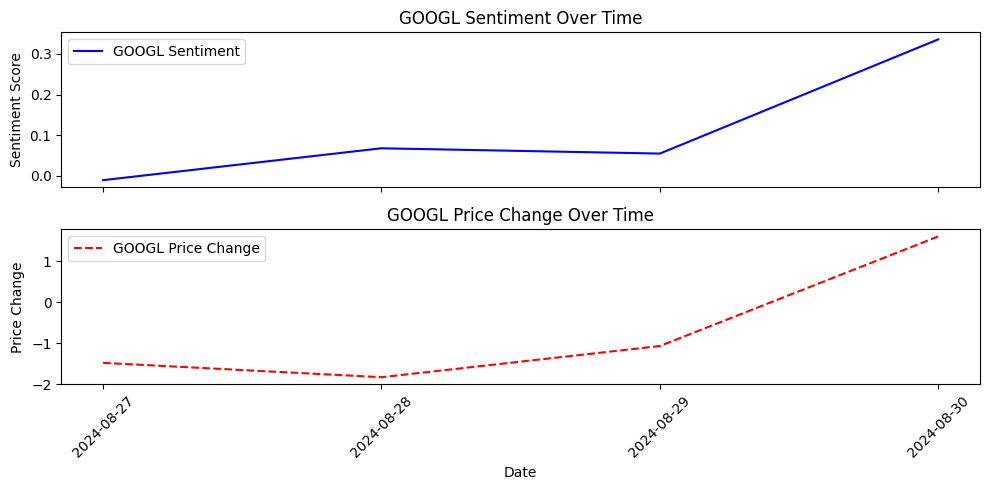

In [79]:

ticker = 'GOOGL'
plot_sentiment_and_price_change(ticker, df)


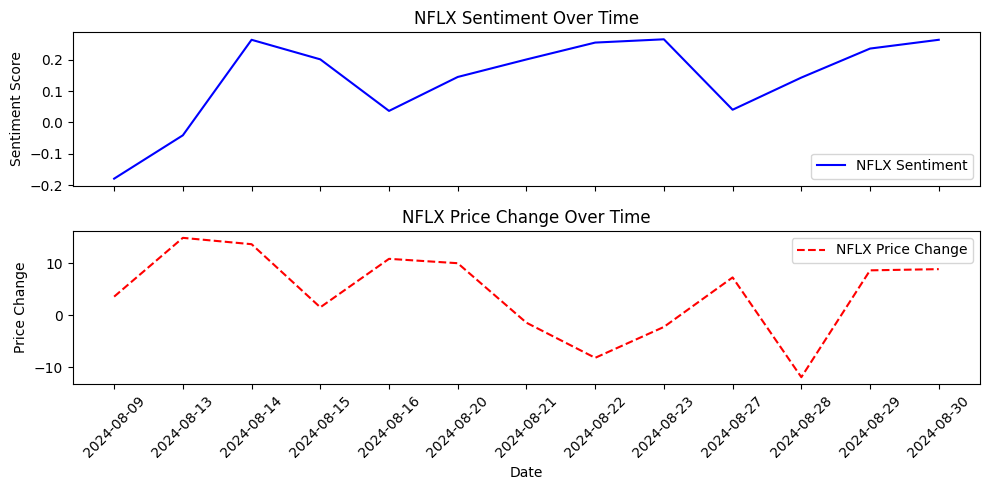

In [80]:

ticker = 'NFLX'
plot_sentiment_and_price_change(ticker, df)



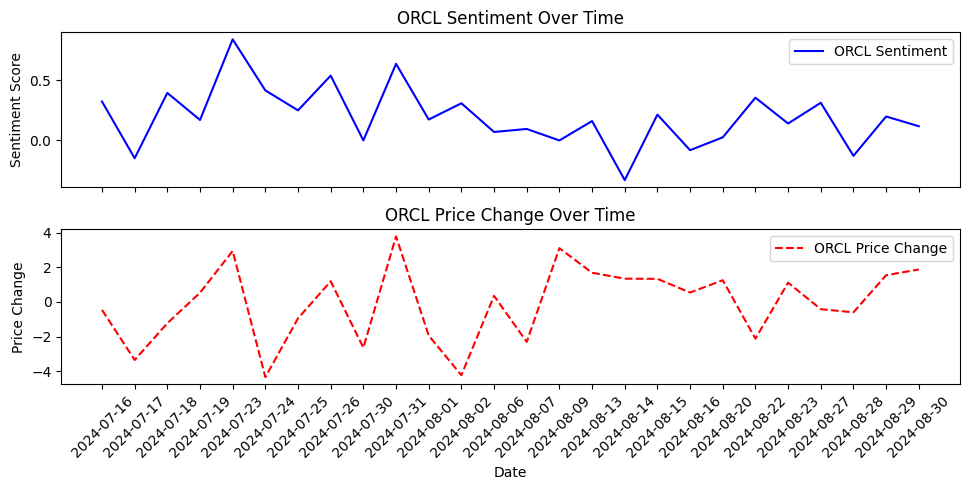

In [81]:

ticker = 'ORCL'
plot_sentiment_and_price_change(ticker, df)



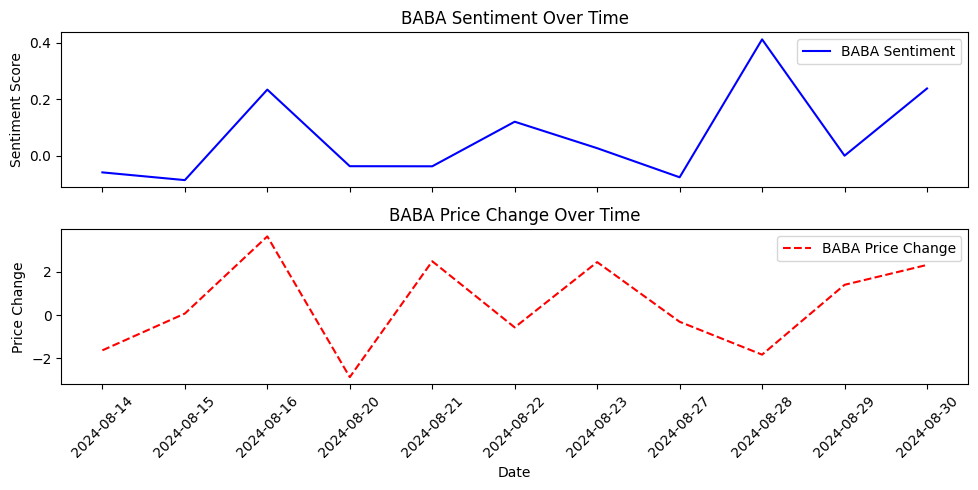

In [86]:
ticker = 'BABA'
plot_sentiment_and_price_change(ticker, df)


now we see a clear effect of sentiment score in stock price but in different levels from one company to another

# Final insights

Over all the data tell us there is no clear relationship between news sentiment and stock price, but when we see the effect of sentiment in each ticker, we see a clear effect, but at different levels from one company to another.

My hypotheses:

- The news sentiment affects clearly stock prices for famous companies that directly deal with users like Netflix and Google and affects less on unknown companies, and this makes a lot of sense.


We can also try ather models for sentiment analysis based on transformers for example because VADER uses the bag of word technique, so it measures the sentiment for each word individually That probably doesn't give accurate results so we can try an advanced technique based on transformers that take the context into account but for simplicity we just use VADER

# Save the data

In [87]:
set_data = df.copy()
set_data.to_csv(SNT_SCORE_DATA_PATH , index=False)